In [5]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import os
import cv2

print(os.listdir("/Users/revan/Desktop/257/train+val"))

Using TensorFlow backend.


['black_measles', 'black_rot', 'healthy', 'leaf_blight']


In [6]:
grape_images = []
labels = [] 
for fruit_dir_path in glob.glob("/Users/revan/Desktop/257/train+val/*"):
    fruit_label = fruit_dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
#         image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
        grape_images.append(image)
        labels.append(fruit_label)
grape_images = np.array(grape_images)
grape_images = grape_images.reshape(len(grape_images),-1)
labels = np.array(labels)
labels

array(['black_measles', 'black_measles', 'black_measles', ...,
       'leaf_blight', 'leaf_blight', 'leaf_blight'], dtype='<U13')

In [7]:
print(np.shape(grape_images))
print(grape_images)
labels

(4071, 65536)
[[177 230 221 ... 141 126 152]
 [157 154 146 ... 192 203 210]
 [144 131 132 ... 196 183 168]
 ...
 [126 136 124 ... 206 210 213]
 [144 155 140 ... 202 203 207]
 [ 85  96 105 ... 187 187 187]]


array(['black_measles', 'black_measles', 'black_measles', ...,
       'leaf_blight', 'leaf_blight', 'leaf_blight'], dtype='<U13')

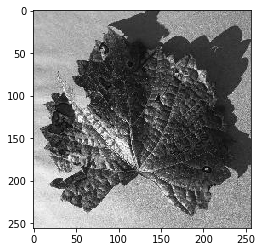

In [13]:
import matplotlib.pyplot as plt
validation_grape_images = []
validation_labels = [] 
for fruit_dir_path in glob.glob("/Users/revan/Desktop/257/test/*"):
    fruit_label = fruit_dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
#         image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        validation_grape_images.append(image)
        validation_labels.append(fruit_label)
validation_grape_images = np.array(validation_grape_images)
plt.imshow(cv2.cvtColor(validation_grape_images[1], cv2.COLOR_GRAY2RGB))
plt.show()
#cv2.imshow(validation_fruit_images[1])
validation_grape_images = validation_grape_images.reshape(len(validation_grape_images),-1)
validation_labels = np.array(validation_labels)

In [9]:
y_train_black_measles= ( labels == 'black_measles') 
y_train_black_rot=(labels == 'black_rot')
y_train_leaf_blight=(labels == 'leaf_blight')
y_train_healthy=(labels == 'healthy')
# y_train_black_measles
y_test_black_measles = (validation_labels == 'black_measles')
y_test_black_rot = (validation_labels == 'black_rot')
y_test_leaf_blight = (validation_labels == 'leaf_blight')
y_test_healthy = (validation_labels == 'healthy')

In [10]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#clf = svm.SVC(decision_function_shape='ovo')
#clf = svm.SVC()
clf=RandomForestClassifier(max_depth=9, random_state=0,n_estimators=100)
y_score = clf.fit(grape_images,labels)


Confusion matrix
Classification report
               precision    recall  f1-score   support

black_measles       0.78      0.81      0.80       267
    black_rot       0.72      0.66      0.69       259
      healthy       0.70      0.97      0.81        61
  leaf_blight       0.81      0.78      0.80       224

     accuracy                           0.76       811
    macro avg       0.75      0.80      0.77       811
 weighted avg       0.77      0.76      0.76       811



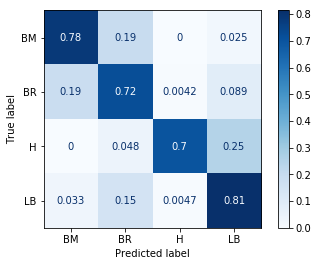

In [12]:
# Testing the data

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

predicted_result = clf.predict(validation_grape_images)

print("Confusion matrix")
plot_confusion_matrix(clf,validation_grape_images,validation_labels,display_labels=['BM','BR','H','LB'],normalize="true",cmap=plt.cm.Blues,)

print("Classification report")
print(classification_report(predicted_result,validation_labels))




In [11]:
print(validation_grape_images[9])
print(validation_labels[9])
print(grape_images[9])
print(labels[9])
for i in range(1,298,30):
    check=clf.predict([grape_images[i]])
    if check:
        print("{} == {}".format(check, labels[i]), end=",")

[135 122 144 ... 177 180 182]
black_measles
[177 181 174 ... 138 149 177]
black_measles
['black_measles'] == black_measles,['black_measles'] == black_measles,['black_measles'] == black_measles,['black_measles'] == black_measles,['black_measles'] == black_measles,['black_measles'] == black_measles,['black_measles'] == black_measles,['black_measles'] == black_measles,['black_measles'] == black_measles,['black_measles'] == black_measles,

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(clf, grape_images,y_train_black_measles, cv=3)
confusion_matrix(y_train_black_measles, y_train_pred)
# Remember our sgd_clf is a binary (5 and not-5) classifier. 
# So we get a 2X2 array
# array([[53361,  1218],
#        [ 1497,  3924]])
# ideal confusion matrix has non-zero elements only in the 
# diagonal like this...
# confusion_matrix(y_train_5, y_train_5)
# array([[54579,     0],
#       [    0,  5421]])

array([[2626,  288],
       [ 509,  648]], dtype=int64)

In [10]:
from sklearn.metrics import precision_score, recall_score
ps = precision_score(y_train_black_measles, y_train_pred)
# 0.7631271878646441
print("Prediction Score:",ps)
rc = recall_score(y_train_black_measles, y_train_pred)
# 0.7238516878804648
print("Recall Score : ",rc)

Prediction Score: 0.6923076923076923
Recall Score :  0.5600691443388073


In [47]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=4234)
y_probas_forest = cross_val_predict(clf, grape_images,
                                    y_train_black_measles, cv=3,
                                    method="predict_proba")
# y_probas_forest = clf.predict_proba(validation_grape_images)[::,1]

y_probas_forest

array([[0.38958647, 0.61041353],
       [0.25980216, 0.74019784],
       [0.43231799, 0.56768201],
       ...,
       [0.72354996, 0.27645004],
       [0.73427111, 0.26572889],
       [0.64375343, 0.35624657]])

In [48]:
y_probas_forest2 = cross_val_predict(clf, grape_images,
                                    y_train_black_rot, cv=3,
                                    method="predict_proba")
y_probas_forest2



array([[0.52237707, 0.47762293],
       [0.48559977, 0.51440023],
       [0.49383162, 0.50616838],
       ...,
       [0.83849683, 0.16150317],
       [0.77763397, 0.22236603],
       [0.48991299, 0.51008701]])

In [49]:
y_probas_forest3 = cross_val_predict(clf,grape_images,
                                    y_train_healthy, cv=3,
                                    method="predict_proba")
y_probas_forest3

array([[0.74731915, 0.25268085],
       [0.8228275 , 0.1771725 ],
       [0.86435572, 0.13564428],
       ...,
       [0.82824705, 0.17175295],
       [0.84414703, 0.15585297],
       [0.90705443, 0.09294557]])

In [50]:
y_probas_forest4 = cross_val_predict(clf, grape_images,
                                    y_train_leaf_blight, cv=3,
                                    method="predict_proba")
y_probas_forest4

array([[0.89438672, 0.10561328],
       [0.91428076, 0.08571924],
       [0.76423751, 0.23576249],
       ...,
       [0.6031643 , 0.3968357 ],
       [0.57779439, 0.42220561],
       [0.68432187, 0.31567813]])

In [51]:
y_scores_forest = y_probas_forest[:, 1] 
y_scores_forest2 = y_probas_forest2[:, 1]
y_scores_forest3 = y_probas_forest3[:, 1]
y_scores_forest4 = y_probas_forest4[:, 1]

# we select 1st column as scores as it is the probability 
# of the positive class

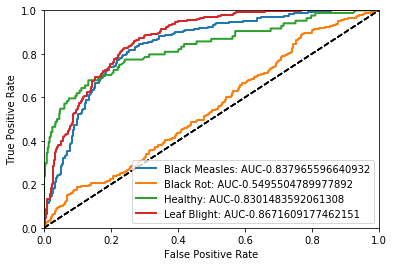

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_roc_curve(fpr, tpr, label ="Random Forest"):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

fpr, tpr, thresholds = roc_curve(y_test_black_measles, 
                                                      y_scores_forest)

fpr2, tpr2, thresholds = roc_curve(y_test_black_rot, 
                                                      y_scores_forest2)

fpr3, tpr3, thresholds = roc_curve(y_test_healthy, 
                                                      y_scores_forest3)

fpr4, tpr4, thresholds = roc_curve(y_test_leaf_blight, 
                                                      y_scores_forest4)
plot_roc_curve(fpr, tpr, "Black Measles: AUC-"+str(roc_auc_score(y_test_black_measles, y_scores_forest)))
plot_roc_curve(fpr2, tpr2, "Black Rot: AUC-"+str(roc_auc_score(y_test_black_rot, y_scores_forest2)))
plot_roc_curve(fpr3, tpr3, "Healthy: AUC-"+str(roc_auc_score(y_test_healthy, y_scores_forest3)))
plot_roc_curve(fpr4, tpr4, "Leaf Blight: AUC-"+str(roc_auc_score(y_test_leaf_blight, y_scores_forest4)))

plt.legend(loc="lower right")

plt.show()


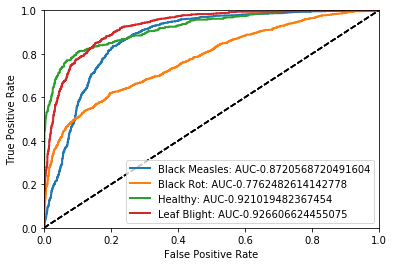

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_roc_curve(fpr, tpr, label ="Random Forest"):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

fpr, tpr, thresholds = roc_curve(y_train_black_measles, 
                                                      y_scores_forest)

fpr2, tpr2, thresholds = roc_curve(y_train_black_rot, 
                                                      y_scores_forest2)

fpr3, tpr3, thresholds = roc_curve(y_train_healthy, 
                                                      y_scores_forest3)

fpr4, tpr4, thresholds = roc_curve(y_train_leaf_blight, 
                                                      y_scores_forest4)
plot_roc_curve(fpr, tpr, "Black Measles: AUC-"+str(roc_auc_score(y_train_black_measles, y_scores_forest)))
plot_roc_curve(fpr2, tpr2, "Black Rot: AUC-"+str(roc_auc_score(y_train_black_rot, y_scores_forest2)))
plot_roc_curve(fpr3, tpr3, "Healthy: AUC-"+str(roc_auc_score(y_train_healthy, y_scores_forest3)))
plot_roc_curve(fpr4, tpr4, "Leaf Blight: AUC-"+str(roc_auc_score(y_train_leaf_blight, y_scores_forest4)))

plt.legend(loc="lower right")

plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_black_measles,
                                                         y_scores_forest)


In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
plt.plot(precisions, recalls, "b--", label="Precision")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="lower left")
plt.show()
